# Loading and training MNIST data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization, Activation, SpatialDropout2D

C:\Users\moham\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [56]:
from keras.datasets import mnist

In [57]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [58]:
np.random.seed(50)
shuffle_indices = np.random.permutation(train_images.shape[0])
train_images = train_images[shuffle_indices]
train_labels = train_labels[shuffle_indices]


val_images = train_images[:10000]
val_labels = train_labels[:10000]
train_images = train_images[10000:]
train_labels = train_labels[10000:]




In [59]:
val_images.shape[0]


10000

In [60]:
train_images.shape[0]


50000

In [61]:
test_images.shape[0]

10000

In [62]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
import numpy as np
from tensorflow.keras.optimizers import RMSprop, Adam
import cv2
import keras
from keras.models import Model
from keras.applications import VGG16
from skimage.transform import resize

In [63]:
# Convert labels to categorical
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)
val_labels = to_categorical(val_labels, num_classes)

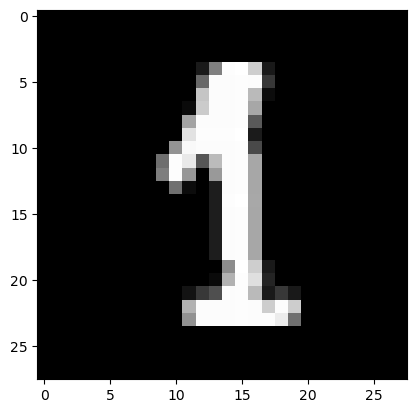

In [64]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='gray')

In [65]:
# Reshape the input images to 3 channels
train_images = np.repeat(train_images[..., np.newaxis], 3, -1)
test_images = np.repeat(test_images[..., np.newaxis], 3, -1)
val_images = np.repeat(val_images[..., np.newaxis], 3, -1)

In [66]:
# Resize the input images to 48x48 to fit VGG16 input size
train_images = np.array([resize(x, (48, 48, 3)) for x in train_images])
test_images = np.array([resize(x, (48, 48, 3)) for x in test_images])
val_images = np.array([resize(x, (48, 48, 3)) for x in val_images])

In [67]:
# Normalize the pixel values
train_images = train_images.astype('float32') / 255.0
val_images = val_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [68]:


# model = Sequential([
#     Conv2D(filters=64, 
#            kernel_size=(3, 3), 
#            strides=1, 
#            padding='same', 
#            input_shape=(48, 48, 3)),
#     BatchNormalization(),
#     Activation('relu'),
#     Conv2D(filters=64, 
#            kernel_size=(3, 3), 
#            strides=1, 
#            padding='same'),
#     BatchNormalization(),
#     Activation('relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     SpatialDropout2D(0.2),

#     Conv2D(filters=128, 
#            kernel_size=(3, 3), 
#            strides=1, 
#            padding='same'),
#     BatchNormalization(),
#     Activation('relu'),
#     Conv2D(filters=128, 
#            kernel_size=(3, 3), 
#            strides=1, 
#            padding='same'),
#     BatchNormalization(),
#     Activation('relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     SpatialDropout2D(0.3),

#     Conv2D(filters=256, 
#            kernel_size=(3, 3), 
#            strides=1, 
#            padding='same'),
#     BatchNormalization(),
#     Activation('relu'),
#     Conv2D(filters=256, 
#            kernel_size=(3, 3), 
#            strides=1, 
#            padding='same'),
#     BatchNormalization(),
#     Activation('relu'),
#     Conv2D(filters=256, 
#            kernel_size=(3, 3), 
#            strides=1, 
#            padding='same'),
#     BatchNormalization(),
#     Activation('relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     SpatialDropout2D(0.4),

#     Flatten(),
#     Dense(512),
#     BatchNormalization(),
#     Activation('relu'),
#     Dropout(0.5),
#     Dense(128),
#     BatchNormalization(),
#     Activation('relu'),
#     Dropout(0.5),
#     Dense(10, activation='softmax')
# ])

In [69]:
# model.summary()

In [70]:
# model.compile(optimizer=Adam(learning_rate= 0.001),
#             loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [71]:
# history = model.fit(train_images, 
#                     train_labels, 
#                     epochs=20, 
#                     batch_size=1024, 
#                     validation_data=(val_images, val_labels),
#                     verbose=1)

In [72]:
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss per Epoch')
# plt.xlabel('Epoch')

# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [73]:
# # Plot the training and validation accuracy per epoch
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy per Epoch')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# MNIST data training using VGG19

In [74]:
# Load the pre-trained VGG16 model
vgg19 = keras.applications.vgg19.VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the layers in VGG16
for layer in vgg19.layers:
    layer.trainable = False

# Add a new classifier on top of the VGG16
# Define the VGG16 model
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 33856)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               4333696   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [76]:
model.compile(optimizer=Adam(learning_rate= 0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [77]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

Epoch 1/20
1563/1563 [==============================] - 89s 57ms/step - loss: 0.6951 - accuracy: 0.7900 - val_loss: 0.2759 - val_accuracy: 0.9222
Epoch 2/20
1563/1563 [==============================] - 92s 59ms/step - loss: 0.3671 - accuracy: 0.8909 - val_loss: 0.2202 - val_accuracy: 0.9341
Epoch 3/20
1563/1563 [==============================] - 95s 61ms/step - loss: 0.3193 - accuracy: 0.9037 - val_loss: 0.1974 - val_accuracy: 0.9408
Epoch 4/20
1563/1563 [==============================] - 91s 59ms/step - loss: 0.2933 - accuracy: 0.9129 - val_loss: 0.1788 - val_accuracy: 0.9488
Epoch 5/20
1563/1563 [==============================] - 88s 57ms/step - loss: 0.2758 - accuracy: 0.9172 - val_loss: 0.1749 - val_accuracy: 0.9496
Epoch 6/20
1563/1563 [==============================] - 89s 57ms/step - loss: 0.2653 - accuracy: 0.9197 - val_loss: 0.1603 - val_accuracy: 0.9534
Epoch 7/20
1563/1563 [==============================] - 90s 58ms/step - loss: 0.2563 - accuracy: 0.9222 - val_loss: 0.1495 -

# Accuracy Metrics

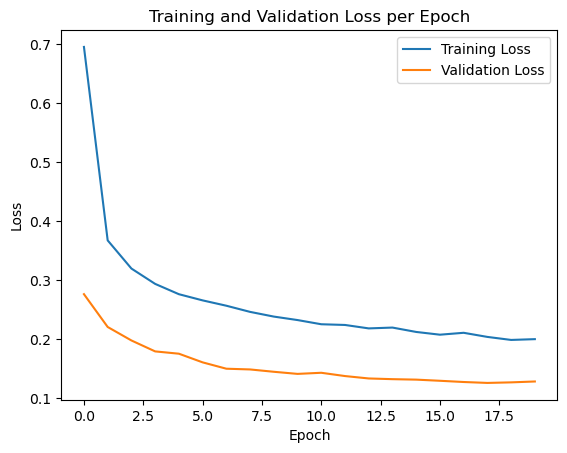

In [78]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')

plt.ylabel('Loss')
plt.legend()
plt.show()

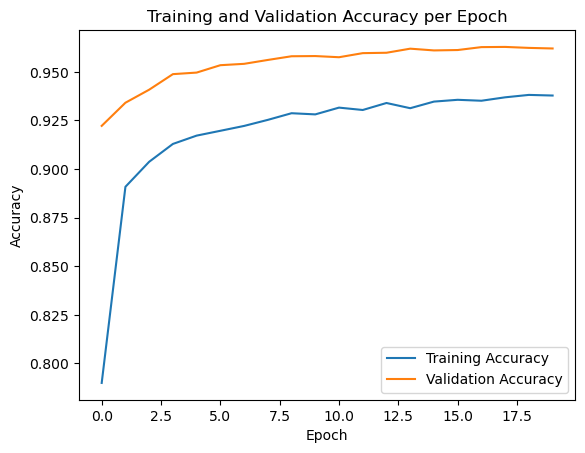

In [79]:
# Plot the training and validation accuracy per epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion Matrix

313/313 [==============================] - 3s 11ms/step


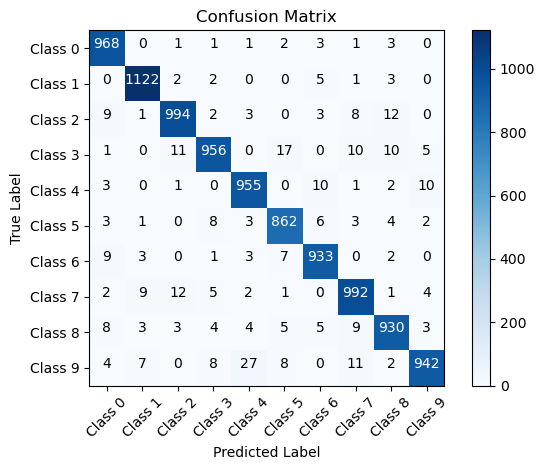

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have the model trained and ready for predictions
  # Your trained model

# Make predictions using the model
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(np.argmax(test_labels, axis=1), predicted_labels)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the confusion matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


# Cross Validation

In [82]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
# Define the number of folds for cross-validation
num_folds = 5

# Initialize lists to store the evaluation results
accuracy_scores = []


# Perform cross-validation
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=50)

# Convert one-hot encoded labels back to categorical labels
train_labels = np.argmax(train_labels, axis=1)
val_labels = np.argmax(val_labels, axis=1)

for train_index, test_index in skf.split(train_images, train_labels):
    # Split data into train and test sets for the current fold
    fold_train_images, fold_test_images = train_images[train_index], train_images[test_index]
    fold_train_labels, fold_test_labels = train_labels[train_index], train_labels[test_index]
    # Evaluate the model on the test data for the current fold
    predictions = model.predict(fold_test_images)
    predicted_labels = np.argmax(predictions, axis=1)
    accuracy = accuracy_score(fold_test_labels, predicted_labels)
    accuracy_scores.append(accuracy)
    
    
    # Compute the mean and standard deviation of the accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

# Print the mean and standard deviation of the accuracy scores
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation Accuracy:", std_accuracy)


313/313 [==============================] - 2s 8ms/step
Mean Accuracy: 0.9742200000000001
Standard Deviation Accuracy: 0.0006305553108173563


# Precision and Recall

In [87]:
from sklearn.metrics import classification_report

# Make predictions on test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)  # Assuming you have true labels for test images

# Compute precision, recall, and F1-score
report = classification_report(true_labels, predicted_labels)

print(report)

313/313 [==============================] - 3s 8ms/step
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.96      0.97      1032
           3       0.97      0.95      0.96      1010
           4       0.96      0.97      0.96       982
           5       0.96      0.97      0.96       892
           6       0.97      0.97      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.96      0.95      0.96       974
           9       0.98      0.93      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



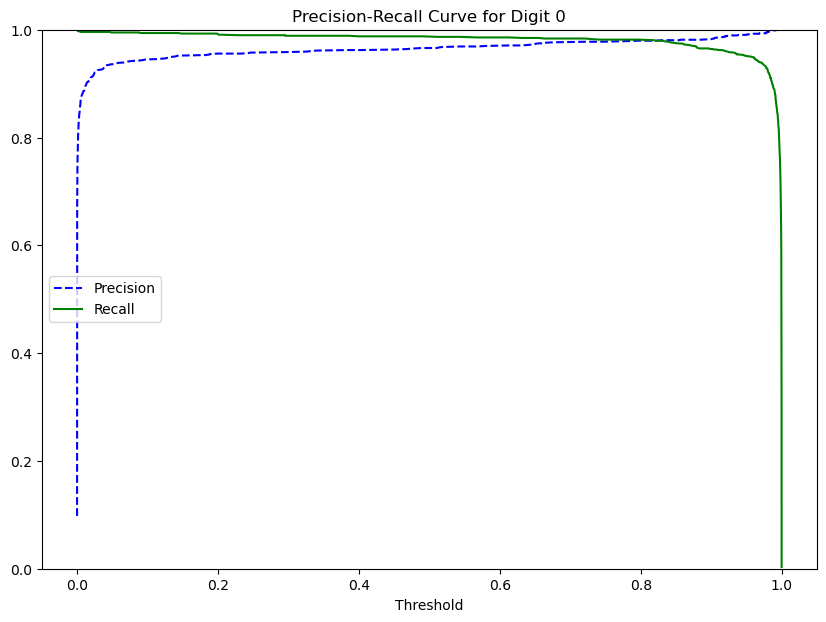

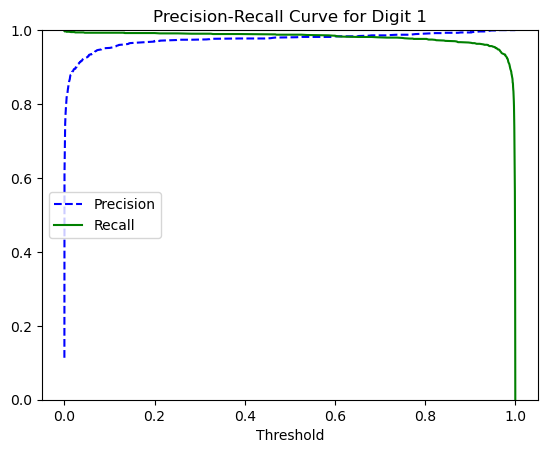

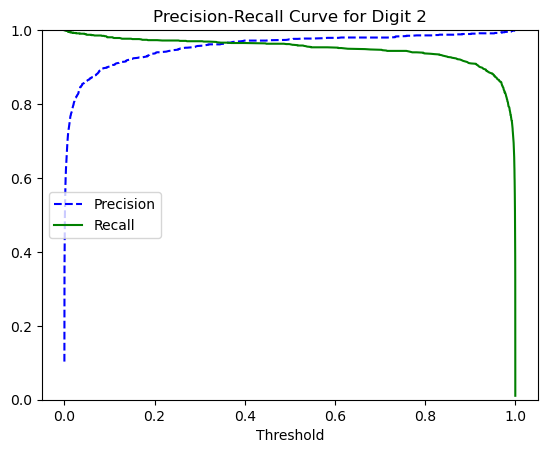

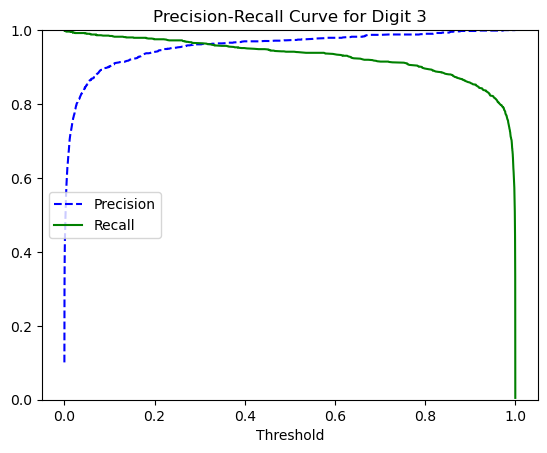

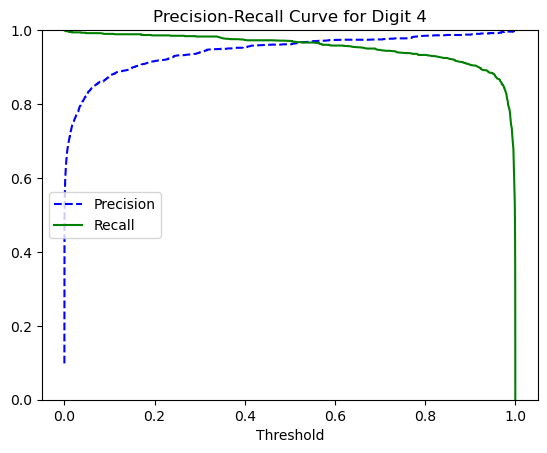

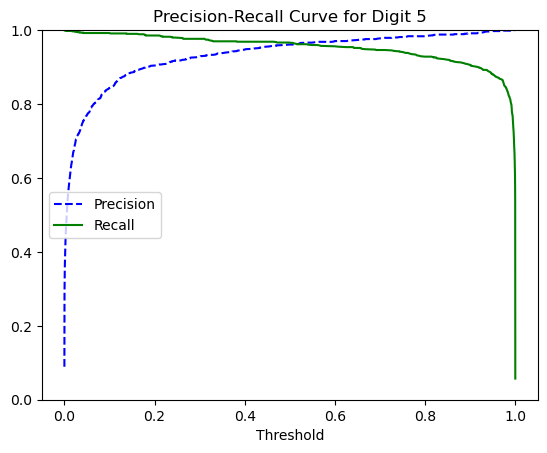

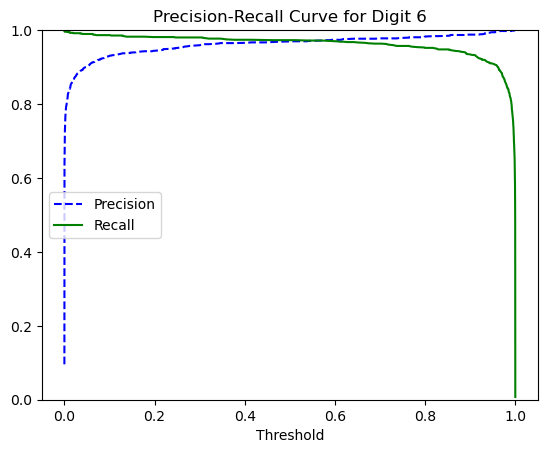

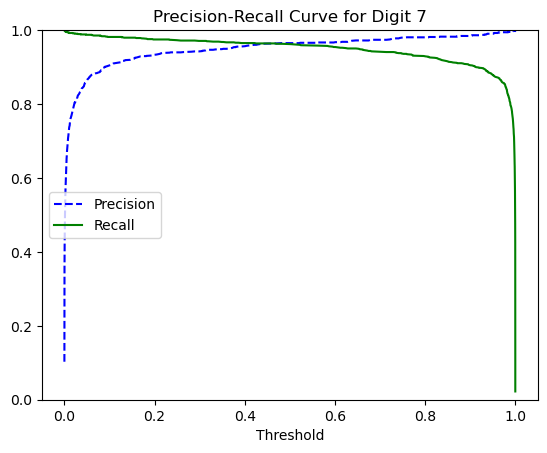

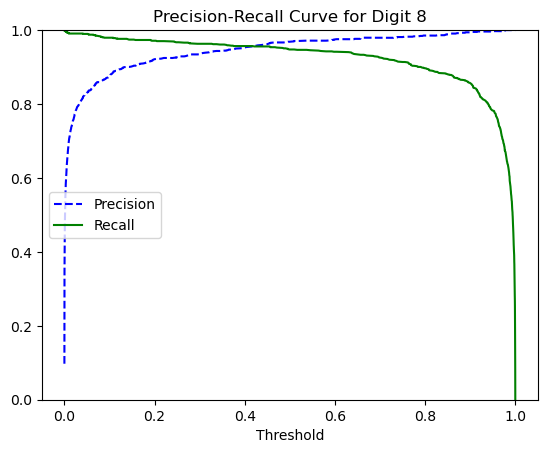

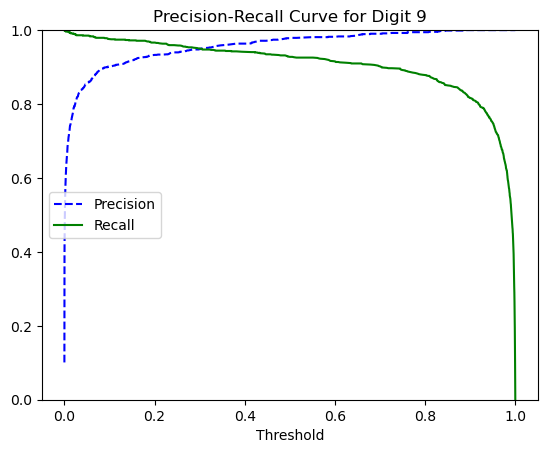

In [99]:
# Plot separate precision and recall curves for each digit
plt.figure(figsize=(10, 7))

for digit in range(10):
    digit_predictions = predictions[:, digit]
    digit_true_labels = (true_labels == digit).astype(int)

    # Compute precision and recall for the current digit
    precision, recall, thresholds = precision_recall_curve(digit_true_labels, digit_predictions)

    # Plot the precision and recall curves for the current digit
    plot_precision_recall_vs_threshold(precision, recall, thresholds)
    plt.title('Precision-Recall Curve for Digit {}'.format(digit))
    plt.show()

313/313 [==============================] - 3s 8ms/step


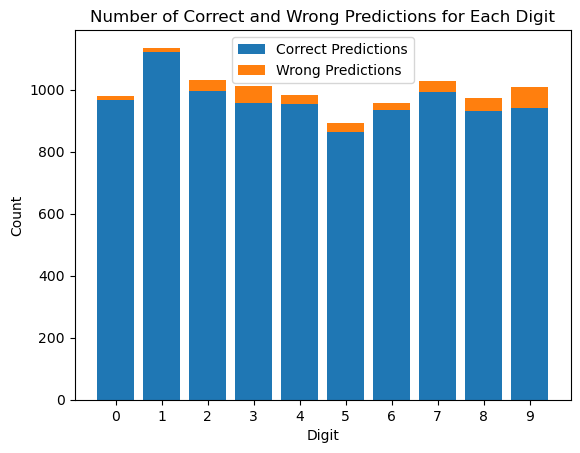

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already trained and compiled the model

# Make predictions on test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)  # Assuming you have true labels for test images

# Initialize counters for correct and wrong predictions
correct_counts = [0] * 10
wrong_counts = [0] * 10

# Count correct and wrong predictions for each digit
for true_label, predicted_label in zip(true_labels, predicted_labels):
    if true_label == predicted_label:
        correct_counts[true_label] += 1
    else:
        wrong_counts[true_label] += 1

# Plot the counts
digits = range(10)  # Update the range to include all digits from 0 to 9
plt.bar(digits, correct_counts, label='Correct Predictions')
digits = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.bar(digits, wrong_counts, bottom=correct_counts, label='Wrong Predictions')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Number of Correct and Wrong Predictions for Each Digit')
plt.legend()
plt.show()


# Visualizations

313/313 [==============================] - 4s 13ms/step


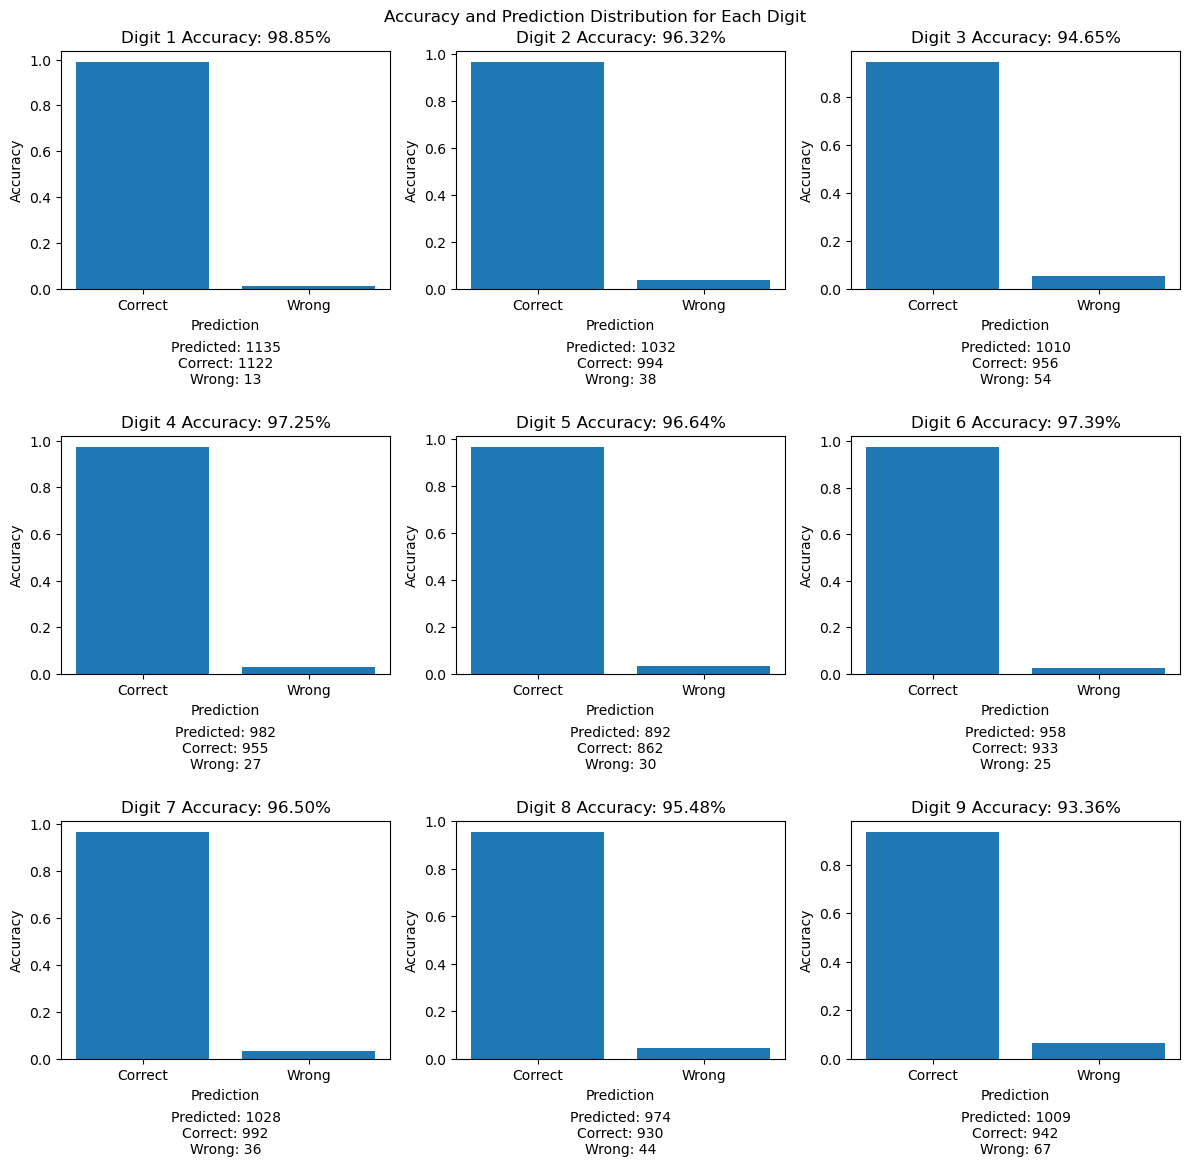

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already trained and compiled the model

# Make predictions on test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)  # Assuming you have true labels for test images

# Initialize counters for correct and wrong predictions
correct_counts = [0] * 10
wrong_counts = [0] * 10

# Iterate over each prediction
for true_label, predicted_label in zip(true_labels, predicted_labels):
    if true_label == predicted_label:
        correct_counts[true_label] += 1
    else:
        wrong_counts[true_label] += 1

# Create a separate plot for each digit
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
fig.suptitle('Accuracy and Prediction Distribution for Each Digit')

digits = range(1, 10)
row = 0
col = 0

for digit in digits:
    total_count = correct_counts[digit] + wrong_counts[digit]
    accuracy = correct_counts[digit] / total_count if total_count != 0 else 0

    ax = axes[row][col]
    ax.bar(['Correct', 'Wrong'], [accuracy, 1 - accuracy])
    ax.set_xlabel('Prediction')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Digit {digit} Accuracy: {accuracy:.2%}')

    ax.text(0.5, -0.4, f'Predicted: {correct_counts[digit] + wrong_counts[digit]}\n'
                       f'Correct: {correct_counts[digit]}\n'
                       f'Wrong: {wrong_counts[digit]}',
            transform=ax.transAxes, horizontalalignment='center')

    col += 1
    if col == 3:
        col = 0
        row += 1

plt.tight_layout()
plt.show()


313/313 [==============================] - 2s 8ms/step


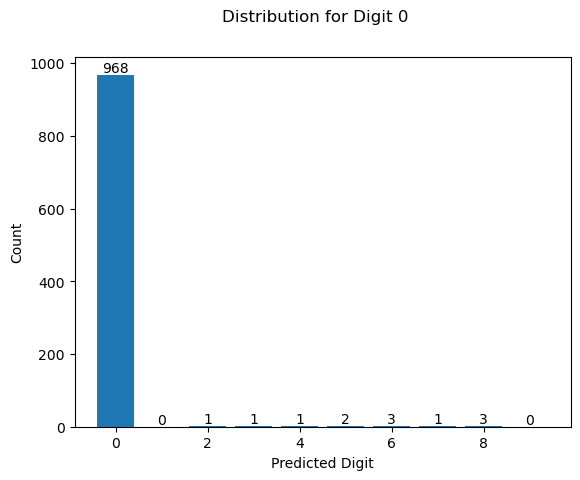

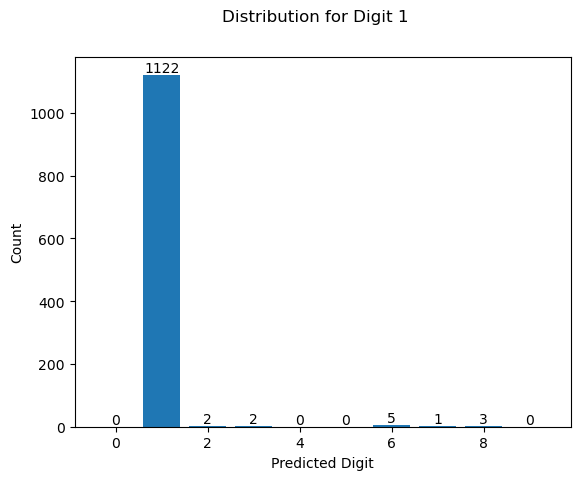

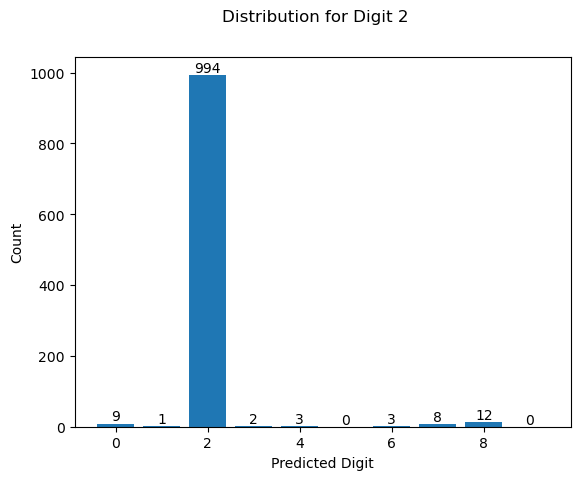

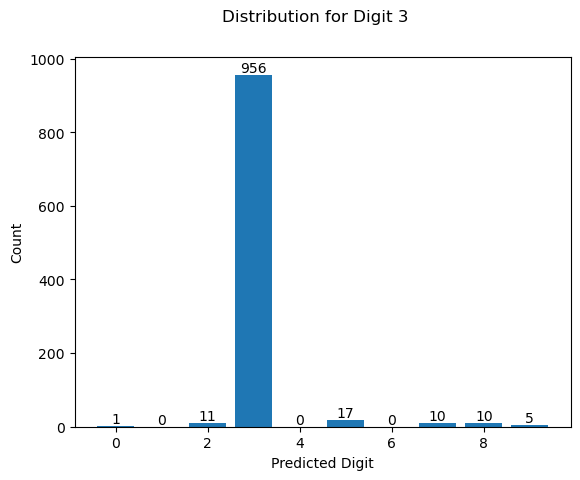

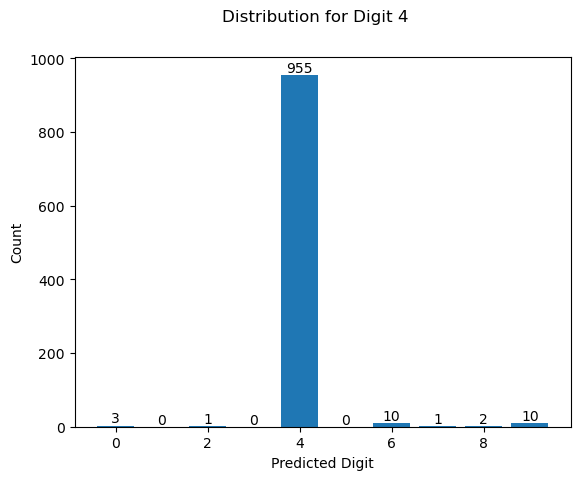

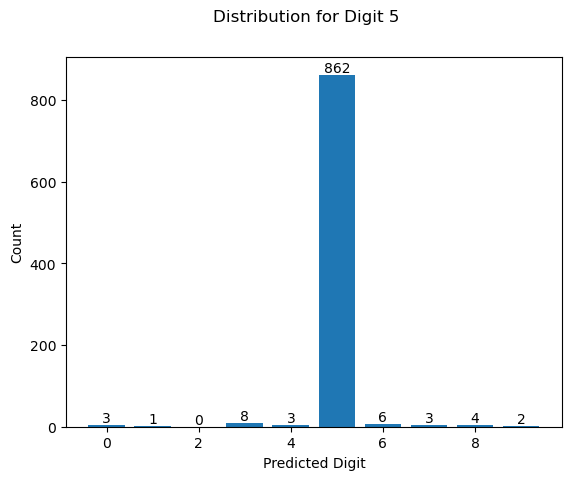

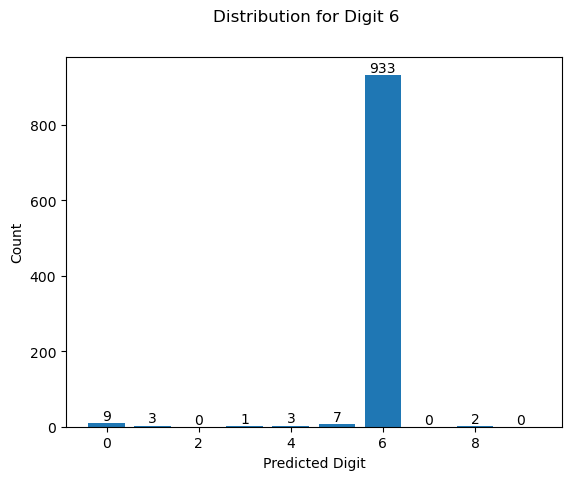

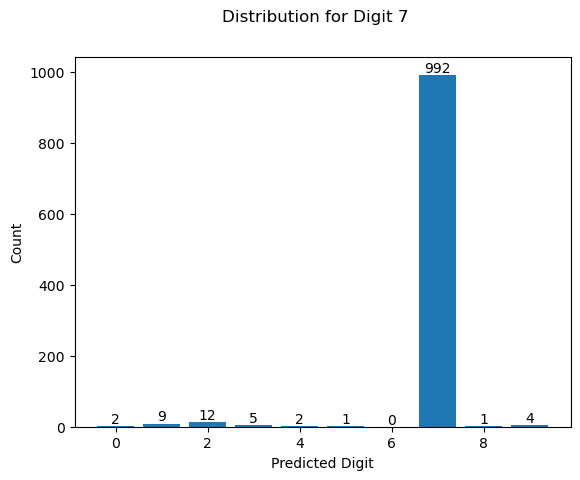

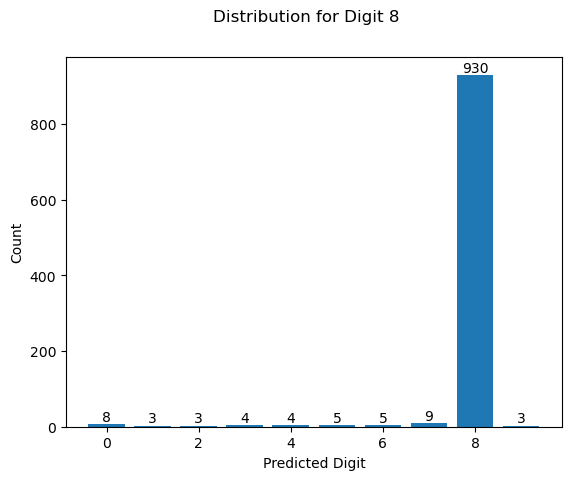

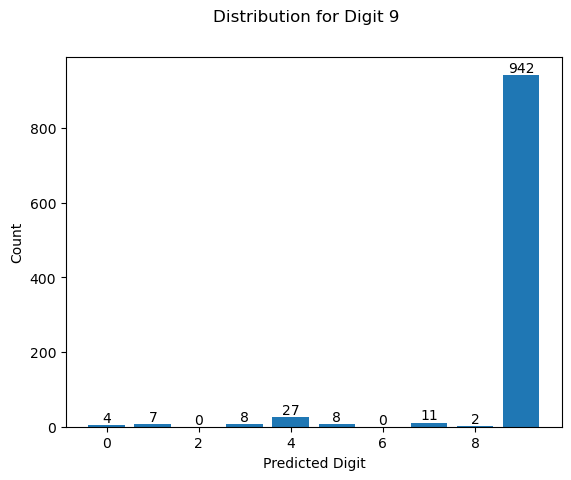

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already trained and compiled the model

# Make predictions on test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)  # Assuming you have true labels for test images

# Initialize counters for predicted label distribution
predicted_label_counts = [[0] * 10 for _ in range(10)]  # 2D list to store counts for each digit

# Iterate over each prediction
for true_label, predicted_label in zip(true_labels, predicted_labels):
    predicted_label_counts[true_label][predicted_label] += 1

# Create a separate plot for each digit
digits = range(10)

for digit in digits:
    fig, ax = plt.subplots()
    fig.suptitle(f'Distribution for Digit {digit}')

    # Get the count of predicted labels for the current digit
    counts = predicted_label_counts[digit]

    # Plot the distribution of predicted labels
    ax.bar(digits, counts)

    # Annotate the count of each predicted label
    for i, count in enumerate(counts):
        ax.annotate(str(count), xy=(i, count), ha='center', va='bottom')

    ax.set_xlabel('Predicted Digit')
    ax.set_ylabel('Count')

plt.show()


In [ ]:
import tensorflow as tf

# Save the trained model in SavedModel format
tf.keras.models.save_model(model, 'model')
